In [1]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt

In [15]:
point = (52.469501, 13.341690)
dist = 500

In [2]:
import osmnx as ox

point = (52.469501, 13.341690)
dist = 500
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_projected = ox.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 129/129 [00:01<00:00, 91.53it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 10/10 [00:00<00:00, 95.16it/s]


Inward offset...
Discretization...


  1%|          | 15/2332 [00:00<00:15, 146.95it/s]

Generating input point array...


100%|██████████| 2332/2332 [00:06<00:00, 339.95it/s]


Generating Voronoi diagram...
Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 424826/424826 [00:10<00:00, 39909.45it/s]


Dissolving Voronoi polygons...
Preparing limit for edge resolving...
Building R-tree...


 17%|█▋        | 40/237 [00:00<00:00, 399.71it/s]

Identifying edge cells...


100%|██████████| 142/142 [00:00<00:00, 825.00it/s]
C:\Users\Alex\anaconda3\lib\site-packages\momepy\elements.py:437: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [1308]
  "unique_id of affected elements: {}".format(list(uids))


Cutting...


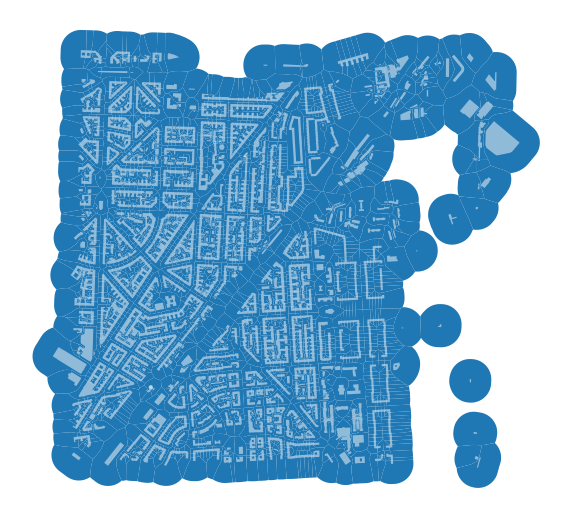

In [3]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax)
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [4]:
tessellation['area'] = momepy.Area(tessellation).series
buildings['area'] = momepy.Area(buildings).series
tess_car = momepy.AreaRatio(tessellation, buildings, 'area', 'area', 'uID')
tessellation['CAR'] = tess_car.series

In [5]:
tess_car = momepy.AreaRatio(tessellation, buildings,
                            momepy.Area(tessellation).series,
                            momepy.Area(buildings).series, 'uID')
tessellation['CAR'] = tess_car.series

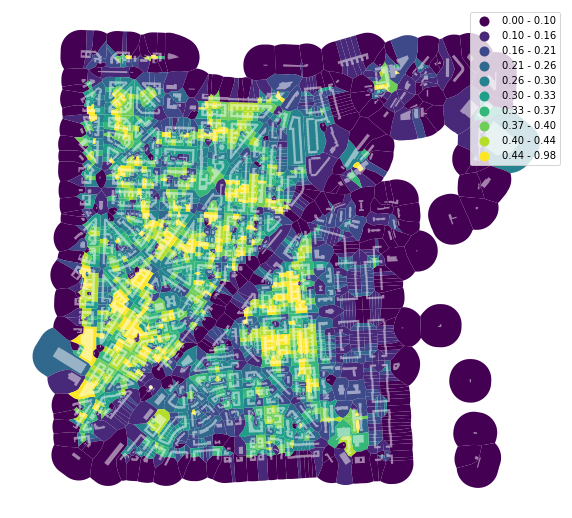

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='CAR', legend=True, scheme='quantiles', k=10, cmap='viridis')
buildings.plot(ax=ax, color='white', alpha=0.5)
ax.set_axis_off()
plt.show()

In [8]:
buildings['height'] = 0

buildings['floor_area'] = momepy.FloorArea(buildings, 'height').series

In [9]:
tessellation['FAR'] = momepy.AreaRatio(tessellation, buildings,
                                       'area', 'floor_area', 'uID').series

C:\Users\Alex\anaconda3\lib\site-packages\mapclassify\classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
C:\Users\Alex\anaconda3\lib\site-packages\mapclassify\classifiers.py:239: UserWarning: Warning: setting k to 1
  Warn("Warning: setting k to %d" % k_q, UserWarning)
C:\Users\Alex\anaconda3\lib\site-packages\mapclassify\classifiers.py:890: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


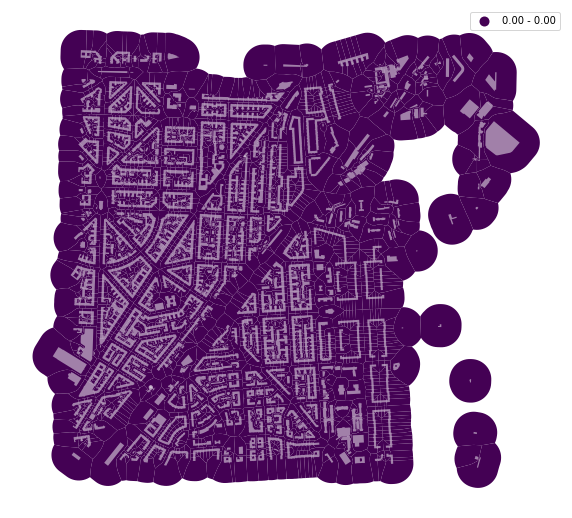

In [10]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='FAR', legend=True, scheme='quantiles', k=10, cmap='viridis')
buildings.plot(ax=ax, color='white', alpha=0.5)
ax.set_axis_off()
plt.show()

In [16]:
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_projected = ox.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 34/34 [00:00<00:00, 133.23it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 3/3 [00:00<00:00, 142.75it/s]


Inward offset...
Discretization...


  4%|▍         | 33/783 [00:00<00:02, 320.11it/s]

Generating input point array...


100%|██████████| 783/783 [00:02<00:00, 349.57it/s]


Generating Voronoi diagram...


Vertices to Polygons:   0%|          | 0/139433 [00:00<?, ?it/s]

Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 139433/139433 [00:03<00:00, 38522.29it/s]


Dissolving Voronoi polygons...


  0%|          | 0/105 [00:00<?, ?it/s]

Preparing limit for edge resolving...
Building R-tree...
Identifying edge cells...


100%|██████████| 73/73 [00:00<00:00, 1176.58it/s]


Cutting...


In [17]:
sw3 = momepy.sw_high(k=3, gdf=tessellation, ids='uID')

In [18]:
tessellation['neighbours'] = momepy.Neighbors(tessellation, sw3,'uID').series

100%|██████████| 782/782 [00:00<00:00, 260540.61it/s]


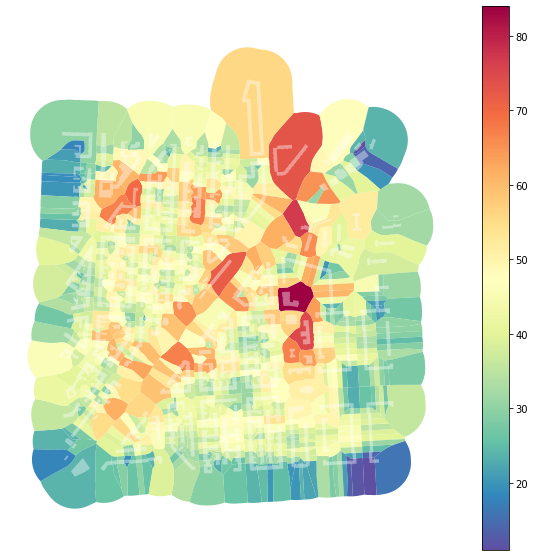

In [19]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='neighbours', legend=True, cmap='Spectral_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [20]:
import libpysal
dist400 = libpysal.weights.DistanceBand.from_dataframe(buildings, 400,
                                                       ids='uID')

In [21]:
tessellation['neighbours400'] = momepy.Neighbors(tessellation, dist400, 'uID').series

100%|██████████| 782/782 [00:00<00:00, 391028.34it/s]


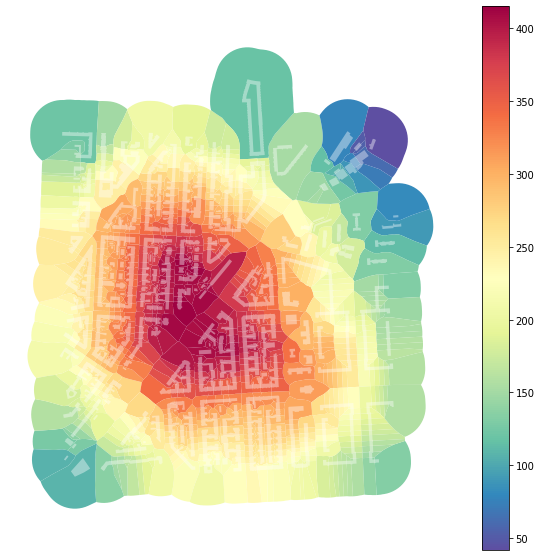

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='neighbours400', legend=True, cmap='Spectral_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [23]:
knn = libpysal.weights.KNN.from_dataframe(buildings, k=200, ids='uID')
tessellation['neighboursKNN'] = momepy.Neighbors(tessellation, knn,'uID').series

100%|██████████| 782/782 [00:00<00:00, 390702.29it/s]


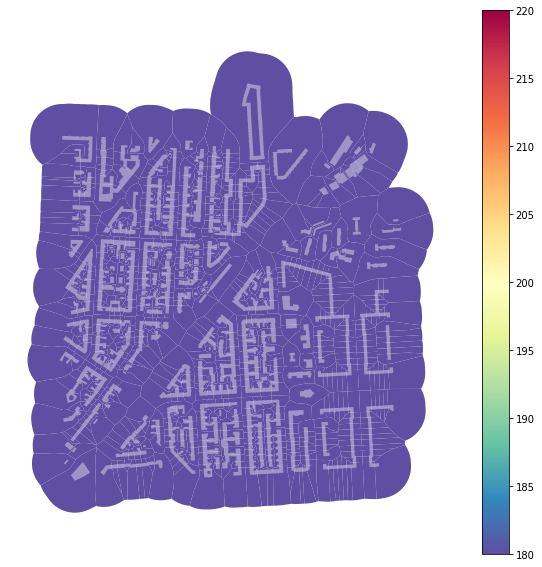

In [24]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='neighboursKNN', legend=True, cmap='Spectral_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [25]:
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_projected = ox.project_gdf(gdf) 

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 34/34 [00:00<00:00, 125.37it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 3/3 [00:00<00:00, 157.83it/s]


Inward offset...
Discretization...


  4%|▍         | 35/783 [00:00<00:02, 339.60it/s]

Generating input point array...


100%|██████████| 783/783 [00:02<00:00, 347.99it/s]


Generating Voronoi diagram...


Vertices to Polygons:   0%|          | 0/139433 [00:00<?, ?it/s]

Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 139433/139433 [00:03<00:00, 37631.18it/s]


Dissolving Voronoi polygons...


 40%|████      | 42/105 [00:00<00:00, 419.63it/s]

Preparing limit for edge resolving...
Building R-tree...
Identifying edge cells...


100%|██████████| 73/73 [00:00<00:00, 1088.51it/s]


Cutting...


In [26]:
sw1 = momepy.sw_high(k=1, gdf=tessellation, ids='uID')

In [27]:
buildings['neighbour_dist'] = momepy.NeighborDistance(buildings, sw1, 'uID').series

100%|██████████| 782/782 [00:00<00:00, 1240.36it/s]


In [28]:
buildings = buildings.dropna(subset=['neighbour_dist'])

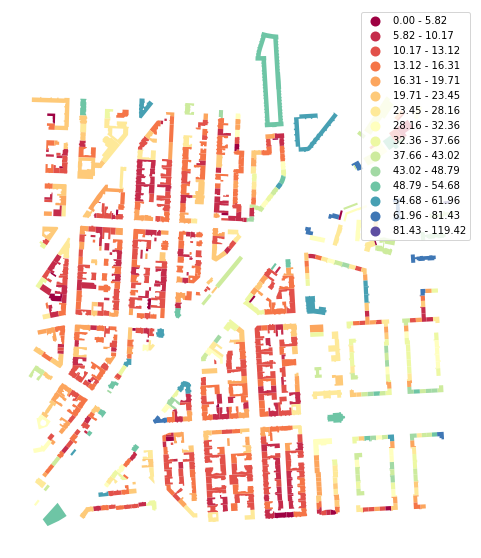

In [29]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='neighbour_dist', scheme='naturalbreaks', k=15, legend=True, cmap='Spectral')
ax.set_axis_off()
plt.show()

In [30]:
sw3 = momepy.sw_high(k=3, gdf=tessellation, ids='uID')

In [31]:
areas = momepy.Area(tessellation).series
mean_area = momepy.AverageCharacter(
    tessellation, values=areas, spatial_weights=sw3, unique_id='uID')
tessellation['mean_area'] = mean_area.mean

100%|██████████| 782/782 [00:00<00:00, 1281.62it/s]


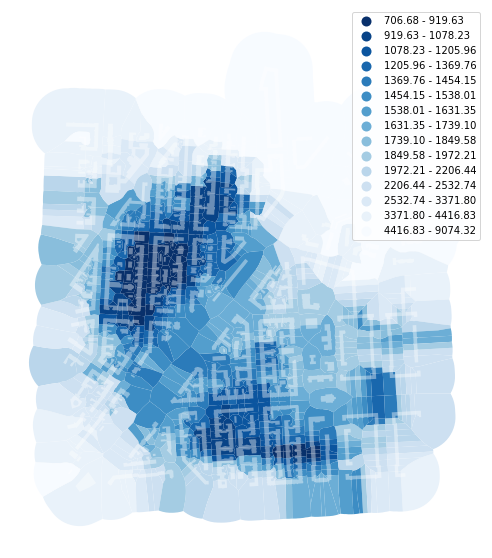

In [32]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='mean_area', legend=True, scheme='quantiles', k=15, cmap='Blues_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [33]:
tessellation['mean_area_iq'] = momepy.AverageCharacter(
    tessellation, areas, sw3, 'uID', rng=(25, 75)).mean

100%|██████████| 782/782 [00:00<00:00, 1183.98it/s]


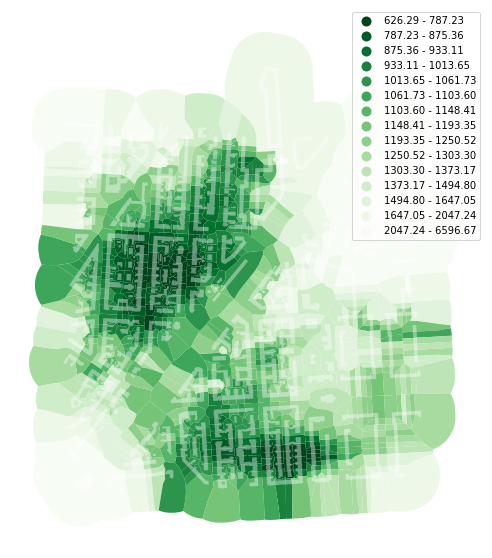

In [34]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='mean_area_iq', legend=True, scheme='quantiles', k=15, cmap='Greens_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [35]:
tessellation['med_area'] = momepy.AverageCharacter(
    tessellation, areas, sw3, 'uID', mode='median').median

100%|██████████| 782/782 [00:00<00:00, 2067.33it/s]


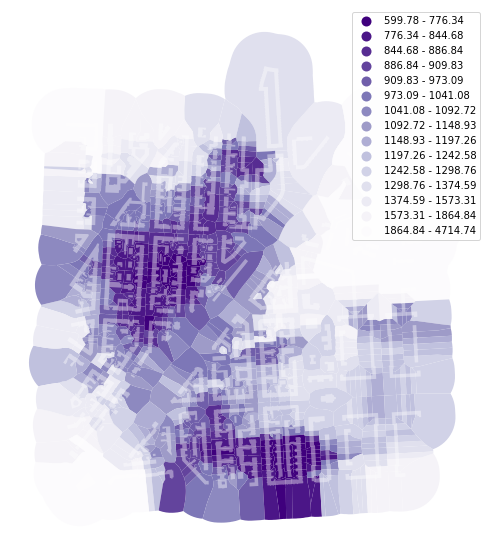

In [36]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='med_area', legend=True, scheme='quantiles', k=15, cmap='Purples_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [37]:
circular_compactness = momepy.CircularCompactness(buildings)
buildings['weighted_circom'] = momepy.WeightedCharacter(
    buildings, circular_compactness.series, sw3, 'uID', momepy.Area(buildings).series).series

100%|██████████| 782/782 [00:00<00:00, 1547.42it/s]


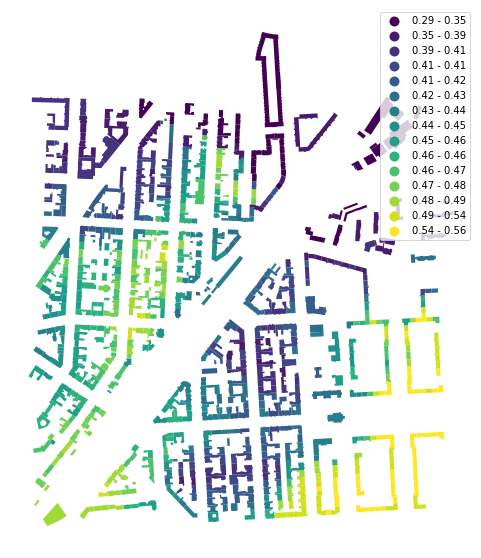

In [38]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='weighted_circom', legend=True, scheme='quantiles', k=15, cmap='viridis')
ax.set_axis_off()
plt.show()

In [39]:
point = (52.469501, 13.341690)
dist = 1000
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_projected = ox.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 129/129 [00:01<00:00, 95.00it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 10/10 [00:00<00:00, 101.95it/s]


Inward offset...
Discretization...


  1%|          | 14/2332 [00:00<00:17, 130.75it/s]

Generating input point array...


100%|██████████| 2332/2332 [00:06<00:00, 335.65it/s]


Generating Voronoi diagram...
Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 424826/424826 [00:11<00:00, 38067.74it/s]


Dissolving Voronoi polygons...
Preparing limit for edge resolving...
Building R-tree...


 19%|█▊        | 44/237 [00:00<00:00, 435.28it/s]

Identifying edge cells...


100%|██████████| 142/142 [00:00<00:00, 849.69it/s]
C:\Users\Alex\anaconda3\lib\site-packages\momepy\elements.py:437: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [1308]
  "unique_id of affected elements: {}".format(list(uids))


Cutting...


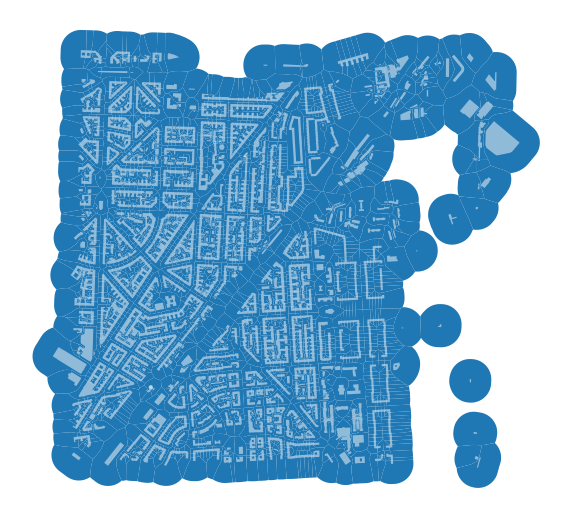

In [40]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax)
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [41]:
buildings['height'] = 0
buildings['floor_area'] = momepy.FloorArea(buildings, 'height').series

In [42]:
tessellation = tessellation.merge(buildings[['uID', 'floor_area']])
sw = momepy.sw_high(k=3, gdf=tessellation, ids='uID')

In [43]:
gross = momepy.Density(
    tessellation, values='floor_area', spatial_weights=sw, unique_id='uID')
tessellation['gross_density'] = gross.series

 98%|█████████▊| 2269/2327 [00:02<00:00, 1101.75it/s]


TypeError: 'numpy.float64' object is not iterable

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='gross_density', legend=True, scheme='naturalbreaks', k=15)
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [ ]:
buildings['area'] = momepy.Area(buildings).series
tessellation = tessellation.merge(buildings[['uID', 'area']])

In [ ]:
coverage = momepy.Density(
    tessellation, values='area', spatial_weights=sw, unique_id='uID')
tessellation['gross_coverage'] = coverage.series

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='gross_coverage', legend=True)
buildings.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [47]:
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_projected = ox.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 129/129 [00:01<00:00, 91.49it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 10/10 [00:00<00:00, 94.27it/s]


Inward offset...
Discretization...


  1%|          | 15/2332 [00:00<00:15, 148.39it/s]

Generating input point array...


100%|██████████| 2332/2332 [00:06<00:00, 340.28it/s]


Generating Voronoi diagram...
Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 424826/424826 [00:11<00:00, 38066.75it/s]


Dissolving Voronoi polygons...
Preparing limit for edge resolving...
Building R-tree...


 16%|█▋        | 39/237 [00:00<00:00, 389.77it/s]

Identifying edge cells...


100%|██████████| 142/142 [00:00<00:00, 820.21it/s]
C:\Users\Alex\anaconda3\lib\site-packages\momepy\elements.py:437: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [1308]
  "unique_id of affected elements: {}".format(list(uids))


Cutting...


In [48]:
sw3 = momepy.sw_high(k=3, gdf=tessellation, ids='uID')

In [49]:
tessellation['area'] = momepy.Area(tessellation).series

In [50]:
area_rng = momepy.Range(tessellation, values='area',
                                        spatial_weights=sw3, unique_id='uID')
tessellation['area_rng'] = area_rng.series


100%|██████████| 2327/2327 [00:01<00:00, 1650.34it/s]


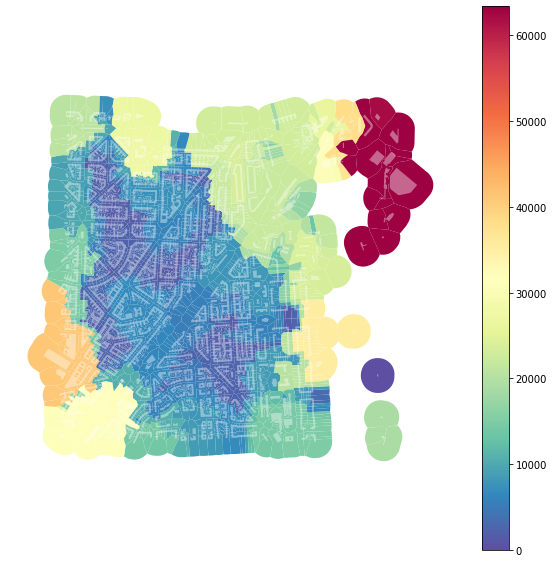

In [51]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_rng', legend=True, cmap='Spectral_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [52]:
area_iqr = momepy.Range(tessellation, values='area',
                        spatial_weights=sw3, unique_id='uID',
                        rng=(25, 75))
tessellation['area_IQR'] = area_iqr.series

100%|██████████| 2327/2327 [00:01<00:00, 1707.31it/s]


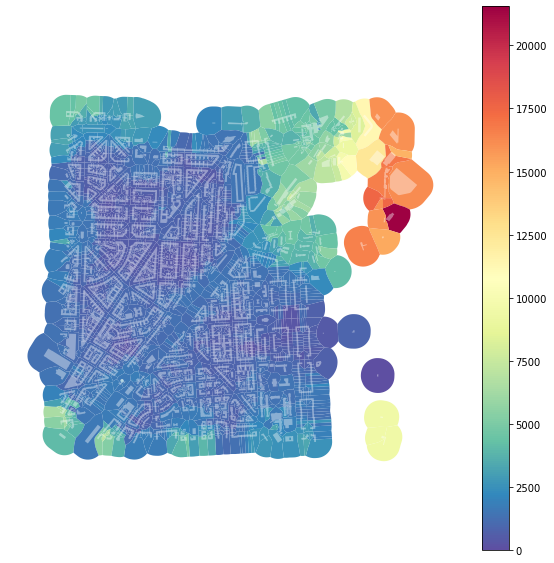

In [53]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_IQR', legend=True, cmap='Spectral_r')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [55]:
area_theil = momepy.Theil(tessellation, values='area',
                          spatial_weights=sw3,
                          unique_id='uID')
tessellation['area_Theil'] = area_theil.series

100%|██████████| 2327/2327 [00:03<00:00, 725.39it/s]


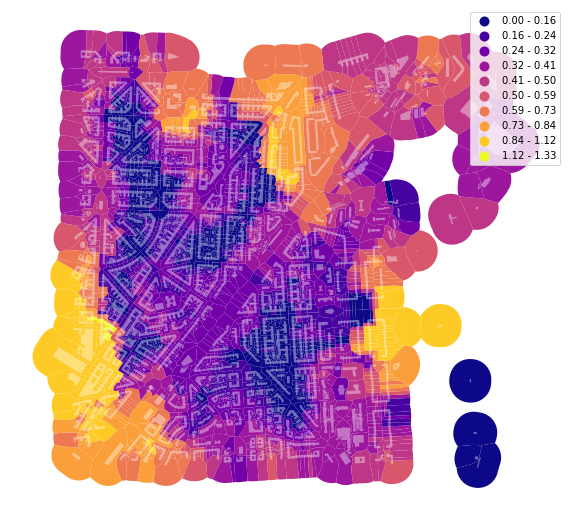

In [56]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_Theil', scheme='fisherjenkssampled', k=10, legend=True, cmap='plasma')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [57]:
area_id_theil = momepy.Theil(tessellation, values='area',
                             spatial_weights=sw3,
                             unique_id='uID',
                             rng=(10, 90))
tessellation['area_Theil_ID'] = area_id_theil.series

100%|██████████| 2327/2327 [00:01<00:00, 1501.97it/s]


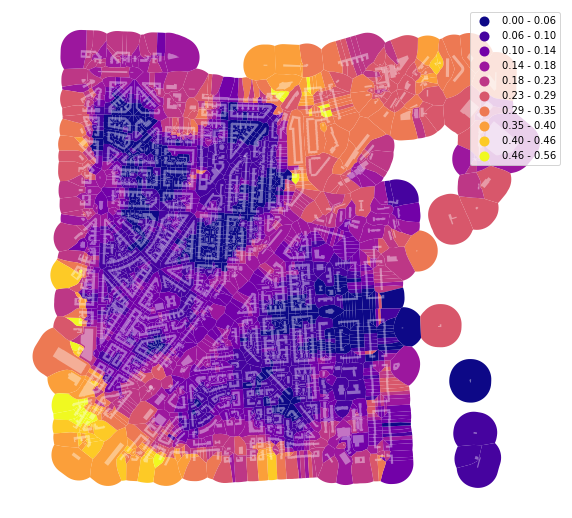

In [58]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_Theil_ID', scheme='fisherjenkssampled', k=10, legend=True, cmap='plasma')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [59]:
area_simpson = momepy.Simpson(tessellation, values='area',
                              spatial_weights=sw3,
                              unique_id='uID')
tessellation['area_simpson'] = area_simpson.series

 96%|█████████▌| 2231/2327 [00:02<00:00, 975.28it/s] C:\Users\Alex\anaconda3\lib\site-packages\mapclassify\classifiers.py:890: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
100%|██████████| 2327/2327 [00:02<00:00, 949.90it/s]


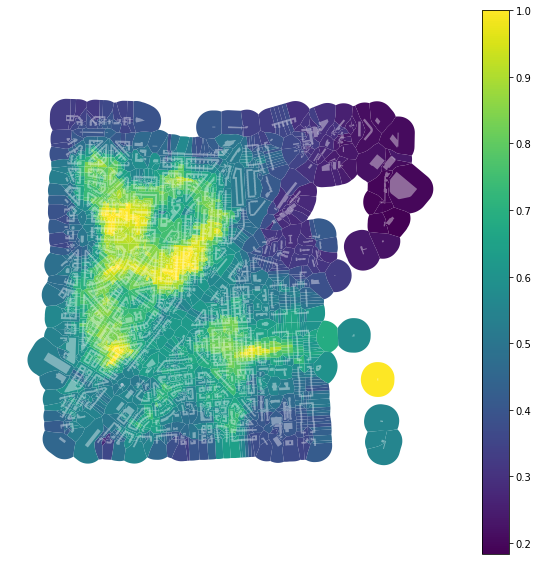

In [60]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_simpson', legend=True, cmap='viridis')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [61]:
tessellation['area_simpson_q7'] = momepy.Simpson(tessellation, values='area',
                                                 spatial_weights=sw3,
                                                 unique_id='uID',
                                                 binning='quantiles', k=7).series

 97%|█████████▋| 2257/2327 [00:02<00:00, 816.46it/s]C:\Users\Alex\anaconda3\lib\site-packages\mapclassify\classifiers.py:890: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam
100%|██████████| 2327/2327 [00:02<00:00, 787.48it/s]


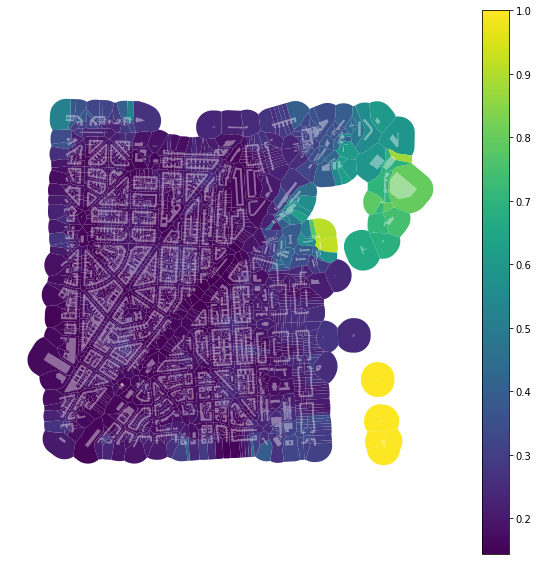

In [62]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation.plot(ax=ax, column='area_simpson_q7', legend=True, cmap='viridis')
buildings.plot(ax=ax, color="white", alpha=0.4)
ax.set_axis_off()
plt.show()

In [63]:
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_projected = ox.project_gdf(gdf)

buildings = momepy.preprocess(gdf_projected, size=30,
                              compactness=True, islands=True)
buildings['uID'] = momepy.unique_id(buildings)
limit = momepy.buffered_limit(buildings)
tessellation = momepy.Tessellation(buildings, unique_id='uID', limit=limit).tessellation

Loop 1 out of 2.


Changing geometry: 100%|██████████| 129/129 [00:01<00:00, 84.93it/s]


Loop 2 out of 2.


Changing geometry: 100%|██████████| 10/10 [00:00<00:00, 97.95it/s]


Inward offset...
Discretization...


  1%|          | 15/2332 [00:00<00:15, 148.41it/s]

Generating input point array...


100%|██████████| 2332/2332 [00:06<00:00, 344.82it/s]


Generating Voronoi diagram...
Generating GeoDataFrame...


Vertices to Polygons: 100%|██████████| 424826/424826 [00:10<00:00, 38881.50it/s]


Dissolving Voronoi polygons...
Preparing limit for edge resolving...
Building R-tree...


  9%|▉         | 22/237 [00:00<00:01, 209.37it/s]

Identifying edge cells...


 52%|█████▏    | 74/142 [00:00<00:00, 732.15it/s]

Cutting...


100%|██████████| 142/142 [00:00<00:00, 622.37it/s]
C:\Users\Alex\anaconda3\lib\site-packages\momepy\elements.py:437: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [1308]
  "unique_id of affected elements: {}".format(list(uids))


In [64]:
import libpysal
dist200 = libpysal.weights.DistanceBand.from_dataframe(buildings, 200,
                                                       ids='uID')

C:\Users\Alex\anaconda3\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 2269.
  warnings.warn(message)


In [65]:
adjac = momepy.BuildingAdjacency(
    buildings, spatial_weights_higher=dist200, unique_id='uID')
buildings['adjacency'] = adjac.series

Calculating spatial weights...


100%|██████████| 2327/2327 [00:00<00:00, 80251.81it/s]

Spatial weights ready...
Calculating adjacency...


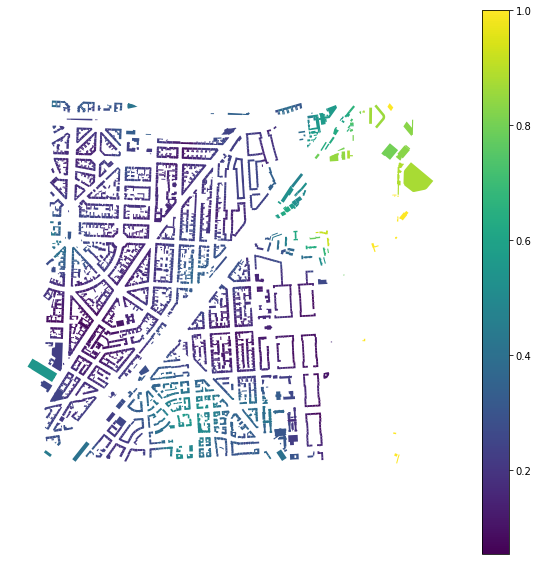

In [66]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='adjacency', legend=True, cmap='viridis')
ax.set_axis_off()
plt.show()

In [67]:
queen = libpysal.weights.Queen.from_dataframe(buildings,
                                              silence_warnings=True,
                                              ids='uID')
queen = momepy.sw_high(k=1, gdf=buildings, ids='uID', contiguity='queen')

In [68]:
buildings['adj2'] = momepy.BuildingAdjacency(buildings,
                                             spatial_weights_higher=dist200,
                                             unique_id='uID',
                                             spatial_weights=queen).series

100%|██████████| 2327/2327 [00:00<00:00, 74972.50it/s]

Calculating adjacency...


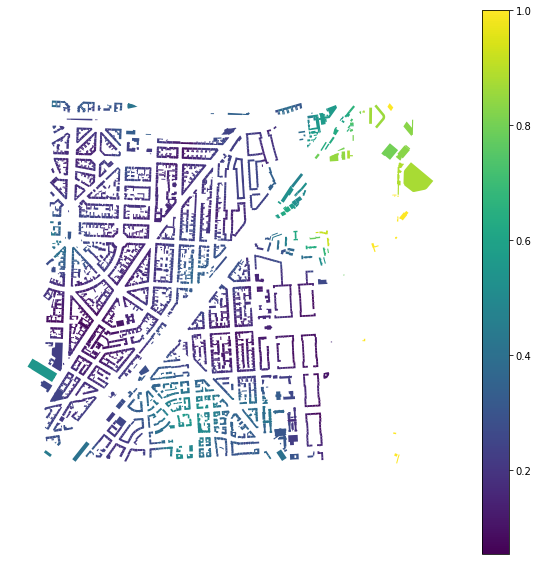

In [69]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='adj2', legend=True, cmap='viridis')
ax.set_axis_off()
plt.show()

In [70]:
sw1 = momepy.sw_high(k=1, gdf=tessellation, ids='uID')
sw3 = momepy.sw_high(k=3, gdf=tessellation, ids='uID')

In [71]:
interblg_distance = momepy.MeanInterbuildingDistance(
    buildings, sw1, 'uID', spatial_weights_higher=sw3)
buildings['mean_ib_dist'] = interblg_distance.series

  0%|          | 0/13624 [00:00<?, ?it/s]C:\Users\Alex\anaconda3\lib\site-packages\momepy\distribution.py:627: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (adj_list.neighbor == row.focal)
  0%|          | 39/13624 [00:00<00:35, 385.86it/s]

Generating adjacency matrix based on weights matrix...
Computing interbuilding distances...


  0%|          | 0/2327 [00:00<?, ?it/s]C:\Users\Alex\anaconda3\lib\site-packages\momepy\distribution.py:648: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  adj_list.neighbor.isin(neighbours)
  4%|▍         | 98/2327 [00:00<00:04, 489.60it/s]

Computing mean interbuilding distances...


 97%|█████████▋| 2246/2327 [00:04<00:00, 498.03it/s]C:\Users\Alex\anaconda3\lib\site-packages\momepy\distribution.py:650: RuntimeWarning: Mean of empty slice
  results_list.append(np.nanmean(selection.distance))
100%|██████████| 2327/2327 [00:04<00:00, 472.06it/s]


In [72]:
buildings['mean_ib_dist'] = momepy.MeanInterbuildingDistance(
    buildings, sw1, 'uID', order=3).series

Generating weights matrix (Queen) of 3 topological steps...


  0%|          | 48/13624 [00:00<00:28, 479.58it/s]

Generating adjacency matrix based on weights matrix...
Computing interbuilding distances...


  2%|▏         | 50/2327 [00:00<00:04, 499.58it/s]

Computing mean interbuilding distances...


100%|██████████| 2327/2327 [00:04<00:00, 490.77it/s]


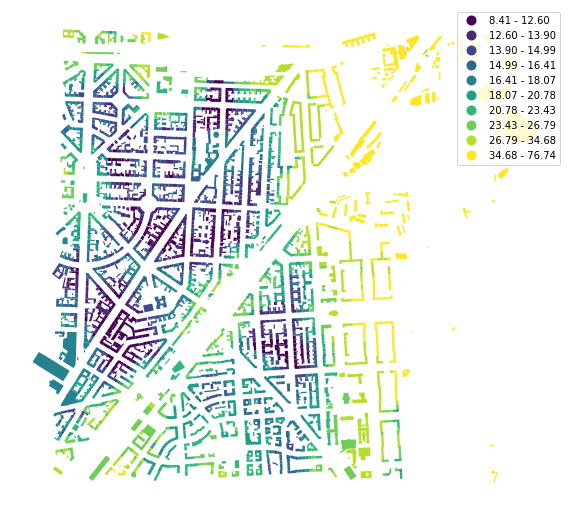

In [73]:
f, ax = plt.subplots(figsize=(10, 10))
buildings.plot(ax=ax, column='mean_ib_dist', scheme='quantiles', k=10, legend=True, cmap='viridis')
ax.set_axis_off()
plt.show()